In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
data=pd.read_excel("/content/cars.xls")

In [ ]:
data.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,US
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,US
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,US
4,ford torino,17.0,8,302.0,140,3449,10.5,70,US


Data processing

In [ ]:
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
count,394.000000,394.000000,394.000000,392.000000,394.000000,394.000000,394.000000
mean,23.472843,5.464467,194.062183,104.469388,2976.060914,15.554569,76.007614
std,7.805051,1.704658,104.508345,38.491160,847.891143,2.763179,3.695461
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.125000,4.000000,105.000000,75.000000,2226.500000,13.800000,73.000000
50%,23.000000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,265.750000,126.000000,3612.000000,17.075000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         394 non-null    object 
 1   MPG           394 non-null    float64
 2   Cylinders     394 non-null    int64  
 3   Displacement  394 non-null    float64
 4   Horsepower    392 non-null    float64
 5   Weight        394 non-null    int64  
 6   Acceleration  394 non-null    float64
 7   Year          394 non-null    int64  
 8   Origin        394 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 27.8+ KB


In [ ]:
data.columns

Index(['Model', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Year', 'Origin'],
      dtype='object')

In [ ]:
data.isnull().sum()

Model           0
MPG             0
Cylinders       0
Displacement    0
Horsepower      2
Weight          0
Acceleration    0
Year            0
Origin          0
dtype: int64

In [ ]:
# Handling missing value by its mean
data["Horsepower"]=data["Horsepower"].fillna(data["Horsepower"].mean())
data.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,US
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,US
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,US
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,US
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,US


In [ ]:
data.isnull().sum()

Model           0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Year            0
Origin          0
dtype: int64

In [ ]:
data["Cylinders"].value_counts()

4    201
8    103
6     83
3      4
5      3
Name: Cylinders, dtype: int64

Graphical Analysis

<Axes: >

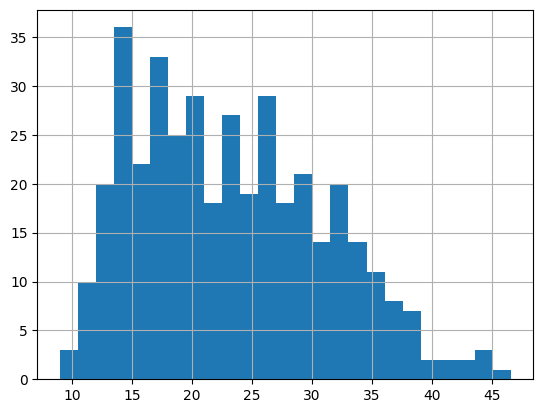

In [ ]:
data["MPG"].hist(bins=25)

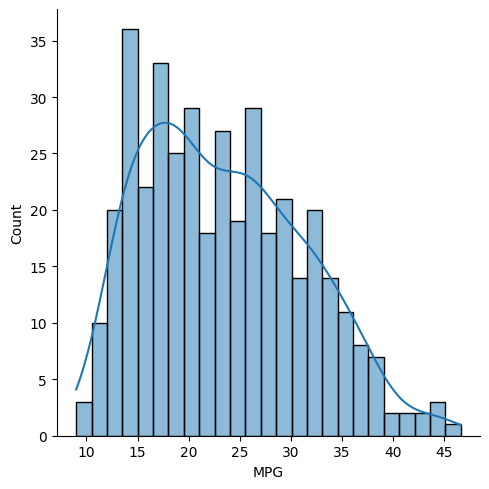

In [ ]:
sns.displot(data["MPG"],bins=25,kde=True)

<Axes: >

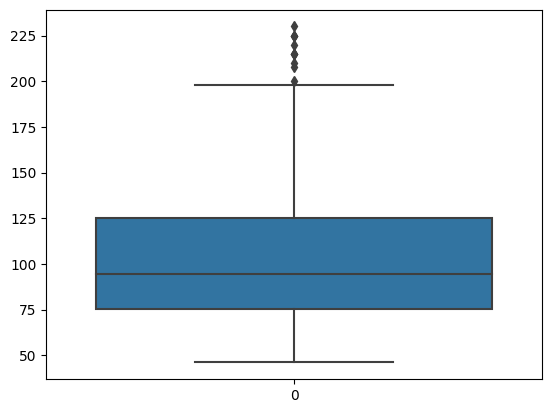

In [ ]:
# looking for outlier using Box plot
sns.boxplot(data["Horsepower"])

Removing Outliers

In [ ]:
data["Horsepower"] = data["Horsepower"].astype('int64')
Q1 = data["Horsepower"].quantile(0.25)
Q3 = data["Horsepower"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = data[(data["Horsepower"] >= lower_bound) & (data["Horsepower"] <= upper_bound)]
print(filtered_df)

                         Model   MPG  Cylinders  Displacement  Horsepower  \
0    chevrolet chevelle malibu  18.0          8         307.0         130   
1            buick skylark 320  15.0          8         350.0         165   
2           plymouth satellite  18.0          8         318.0         150   
3                amc rebel sst  16.0          8         304.0         150   
4                  ford torino  17.0          8         302.0         140   
..                         ...   ...        ...           ...         ...   
389            ford mustang gl  27.0          4         140.0          86   
390                  vw pickup  44.0          4          97.0          52   
391              dodge rampage  32.0          4         135.0          84   
392                ford ranger  28.0          4         120.0          79   
393                 chevy s-10  31.0          4         119.0          82   

     Weight  Acceleration  Year  Origin  
0      3504          12.0    70  

<Axes: >

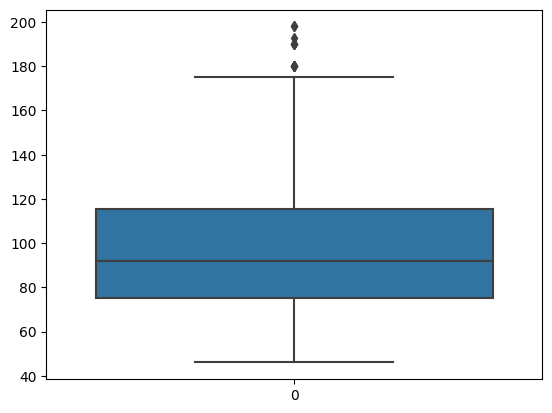

In [ ]:
sns.boxplot(filtered_df["Horsepower"])

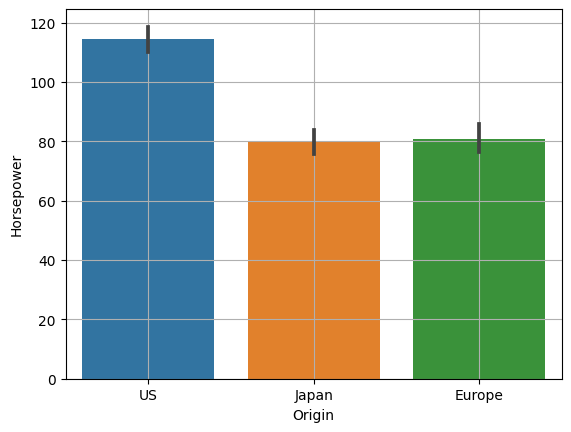

In [ ]:
sns.barplot(x="Origin",y="Horsepower",data=filtered_df)
plt.grid()
plt.show()

Correlation

In [ ]:
# Looking for correlation between 'MPG' and other variables
cordata=filtered_df.corr()
cordata["MPG"].sort_values()

<ipython-input-61-c83861eab3cc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cordata=filtered_df.corr()


Weight         -0.824236
Displacement   -0.800461
Horsepower     -0.784851
Cylinders      -0.763821
Acceleration    0.389416
Year            0.557373
MPG             1.000000
Name: MPG, dtype: float64

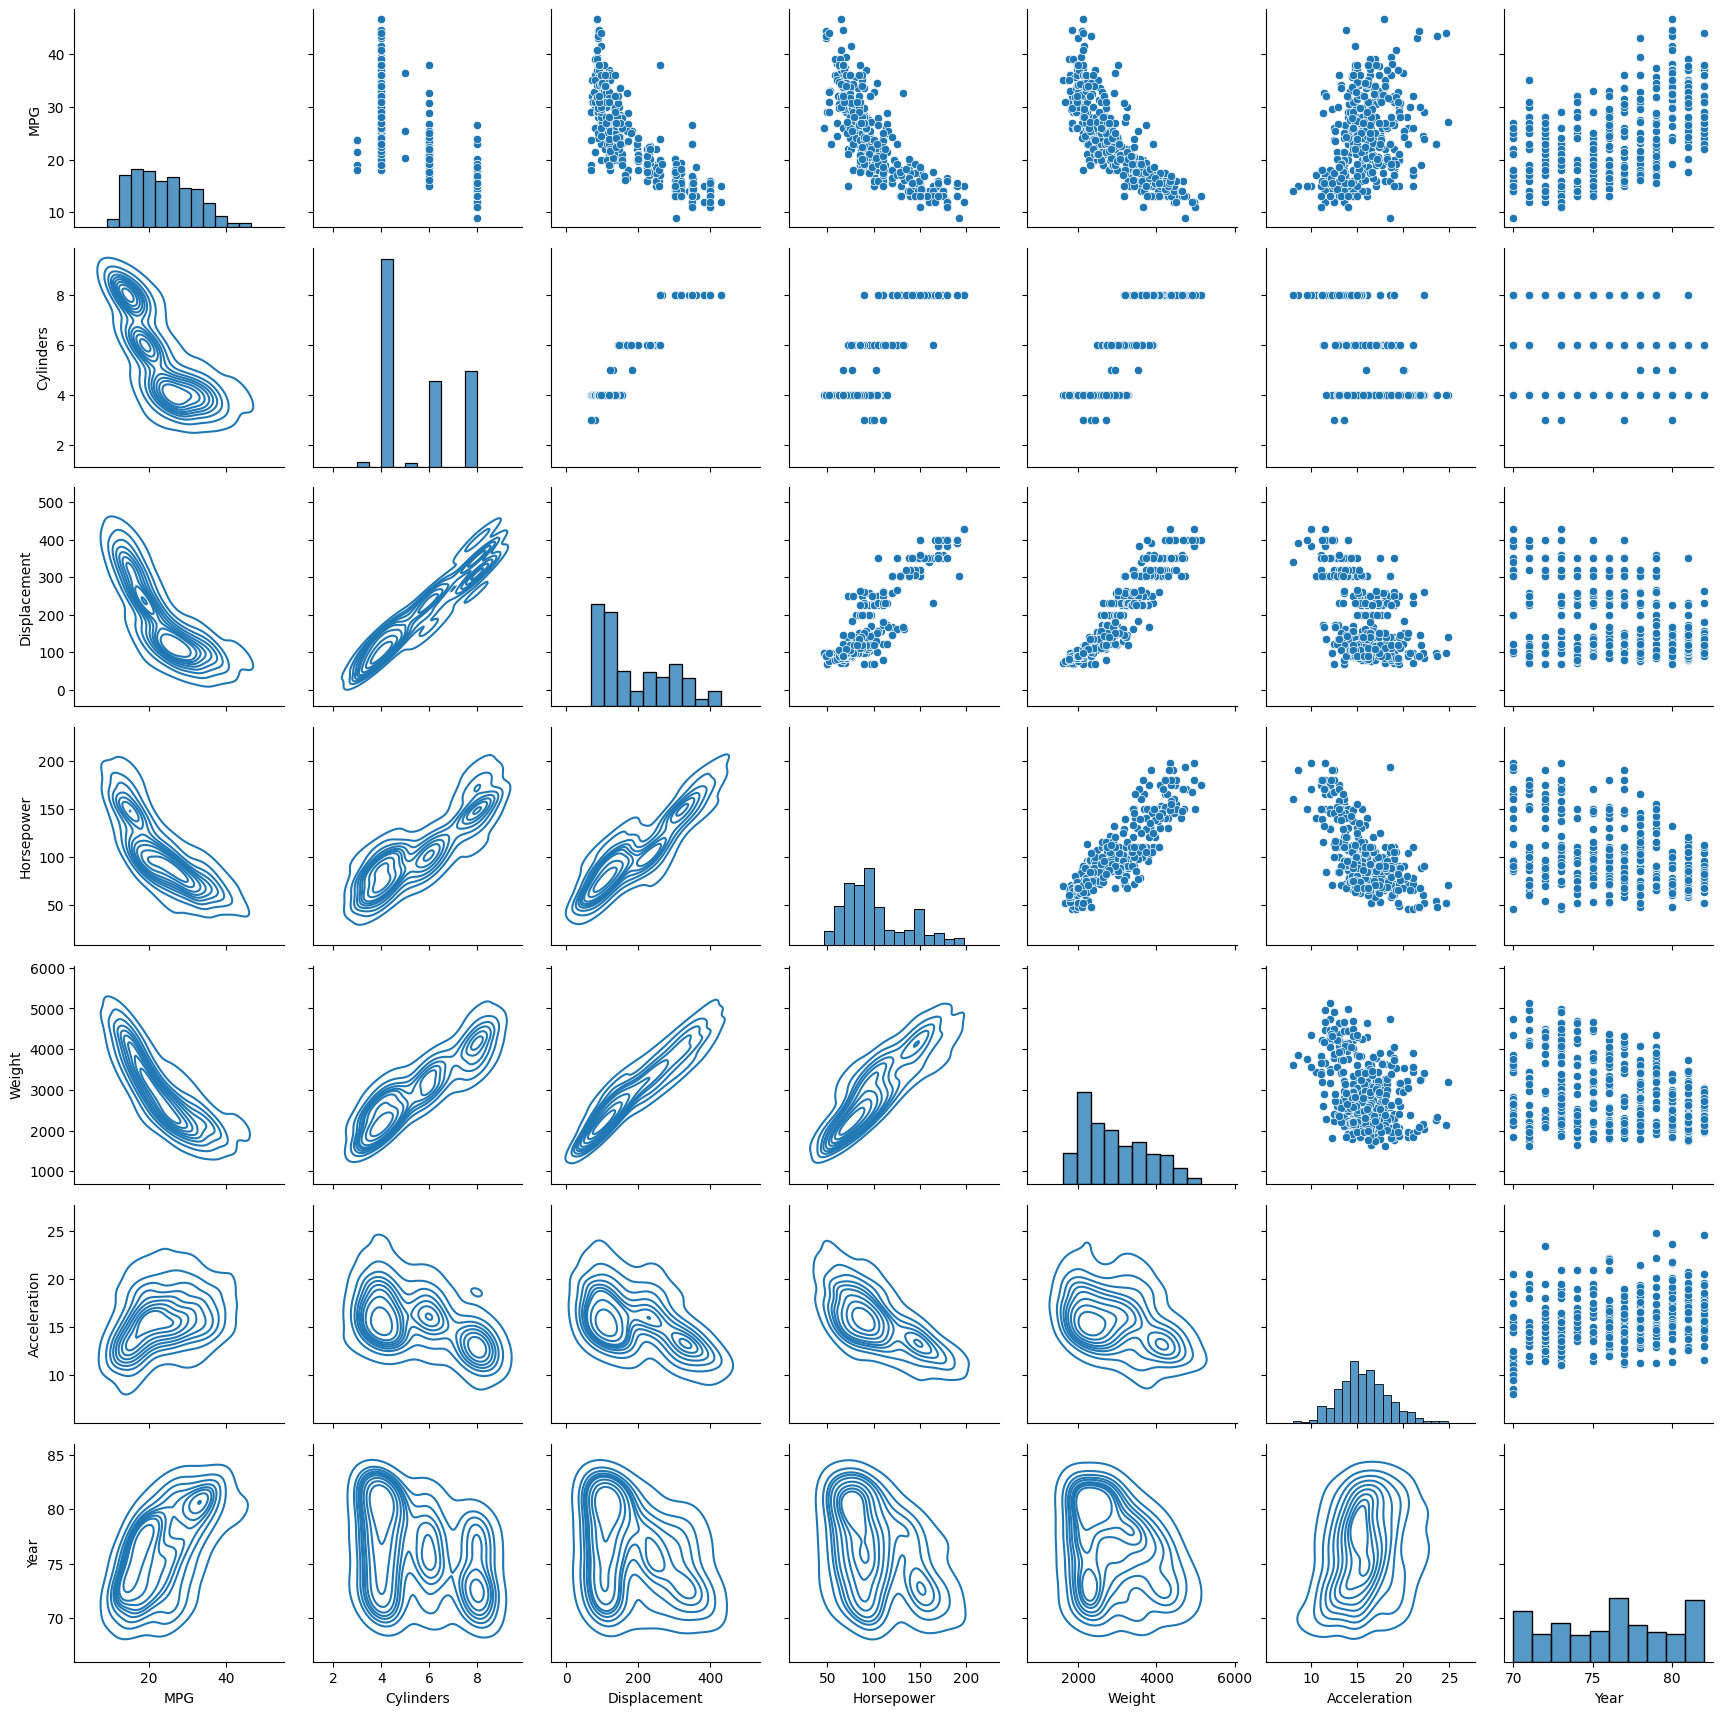

In [ ]:
g = sns.PairGrid(filtered_df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

<ipython-input-67-0c7409a410b7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(filtered_df.corr(), annot=True, cmap='coolwarm')


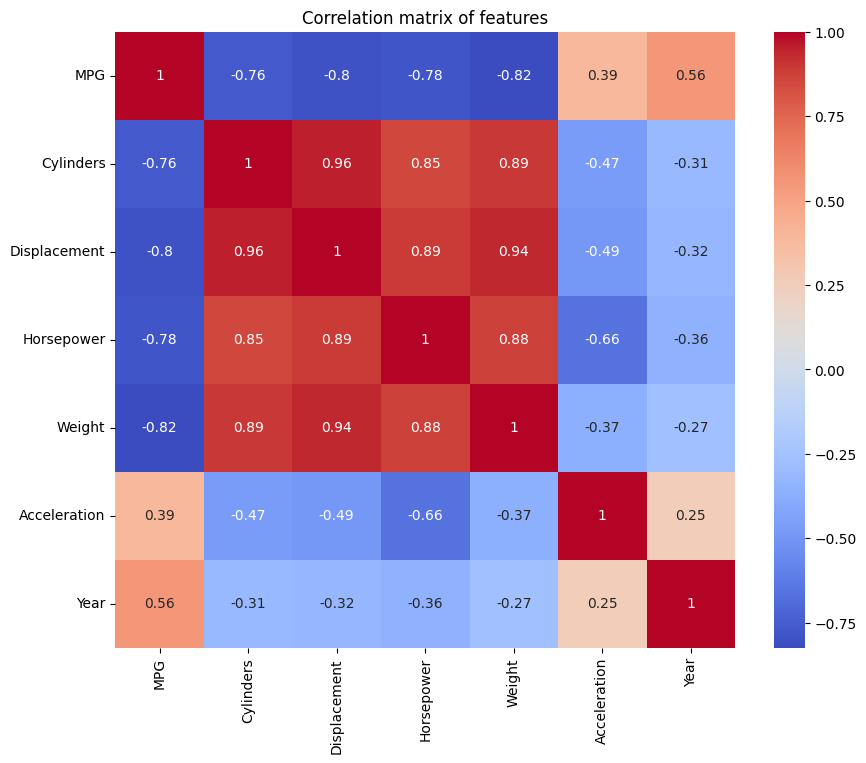

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix of features')
plt.show()

In [ ]:
filtered_df=pd.get_dummies(filtered_df,columns=["Origin"])
filtered_df.columns

Index(['Model', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Year', 'Origin_Europe', 'Origin_Japan', 'Origin_US'],
      dtype='object')

In [ ]:
filtered_df_var=['Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Year', 'Origin_Europe', 'Origin_Japan', 'Origin_US']


In [ ]:
x=filtered_df[filtered_df_var]
y=filtered_df["MPG"]

In [ ]:
x.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin_Europe,Origin_Japan,Origin_US
0,8,307.0,130,3504,12.0,70,0,0,1
1,8,350.0,165,3693,11.5,70,0,0,1
2,8,318.0,150,3436,11.0,70,0,0,1
3,8,304.0,150,3433,12.0,70,0,0,1
4,8,302.0,140,3449,10.5,70,0,0,1


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 393
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cylinders      383 non-null    int64  
 1   Displacement   383 non-null    float64
 2   Horsepower     383 non-null    int64  
 3   Weight         383 non-null    int64  
 4   Acceleration   383 non-null    float64
 5   Year           383 non-null    int64  
 6   Origin_Europe  383 non-null    uint8  
 7   Origin_Japan   383 non-null    uint8  
 8   Origin_US      383 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 30.2 KB


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.3)

In [ ]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(x_test)

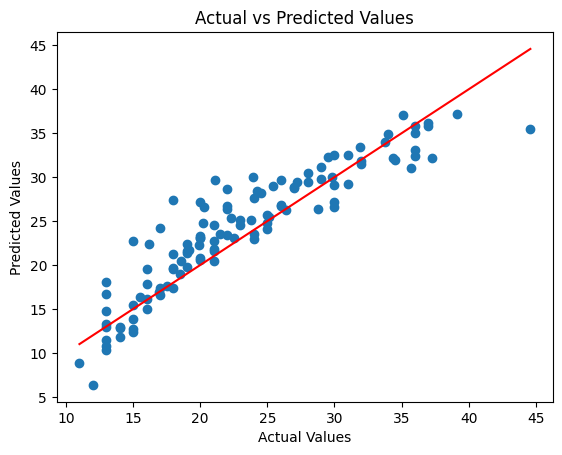

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')s
plt.title('Actual vs Predicted Values')
plt.show()

mean squared error and mean absolute error

In [ ]:
print("Mean squared error ",mean_squared_error(y_test,y_pred))
print("Mean absolute error ",mean_absolute_error(y_test,y_pred))

Mean squared error  9.84349272204386
Mean absolute error  2.372083511719339


R2 Score

In [ ]:
score = r2_score(y_test, y_pred)
print(score)

0.817005606540436


Residuals Analysis

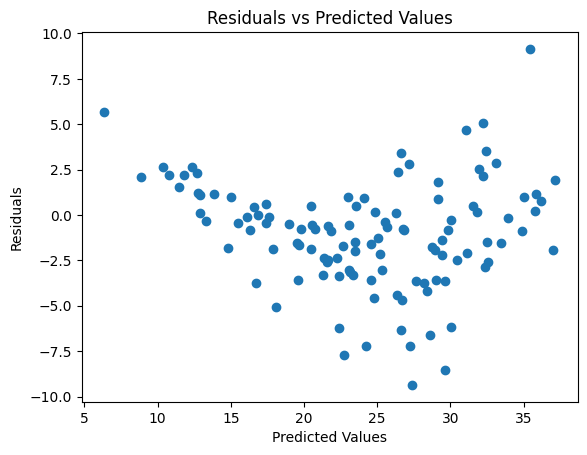

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

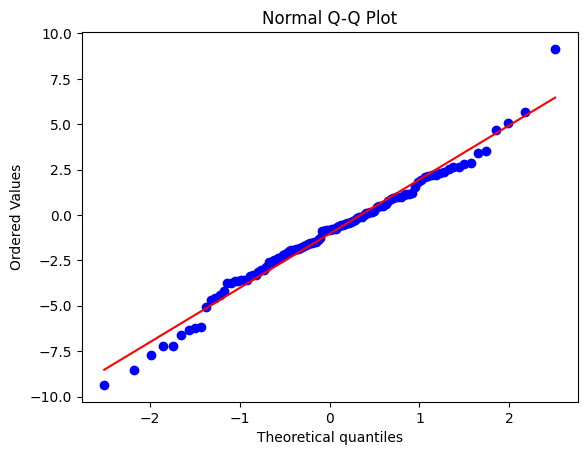

In [ ]:
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

<Figure size 5000x3000 with 0 Axes>

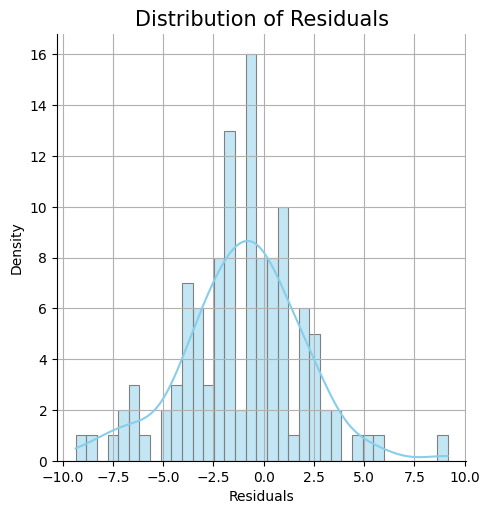

In [ ]:
plt.figure(figsize=(50, 30))
sns.displot(residuals, bins=35, kde=True, color='skyblue', edgecolor='gray')
plt.title('Distribution of Residuals', fontsize=15)
plt.xlabel('Residuals', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.grid(True)
plt.show()